In [41]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def load_log(file):
    '''Reads log file top to bottom and extract the strings of prec@1 values for figure'''
    results = [] #stores all the precisions
    with open(file) as f: #opens the whole txt/log file
        for line in f: #iterate line by line
            if '* Prec@1' in line: #this is the average accuracy of the whole validation set of batches 
                line = line.split() #splits each token in the string
                results.append(float(line[-1])) #append the last token in the line as a float
    return results

In [43]:
shows = {}
shows['vgg16_bn'] = load_log('log_vgg16_bn')

In [44]:
print(shows)

{'vgg16_bn': [9.961, 22.266, 23.828, 28.516, 29.688, 31.641, 30.859, 37.891, 35.742, 32.227]}


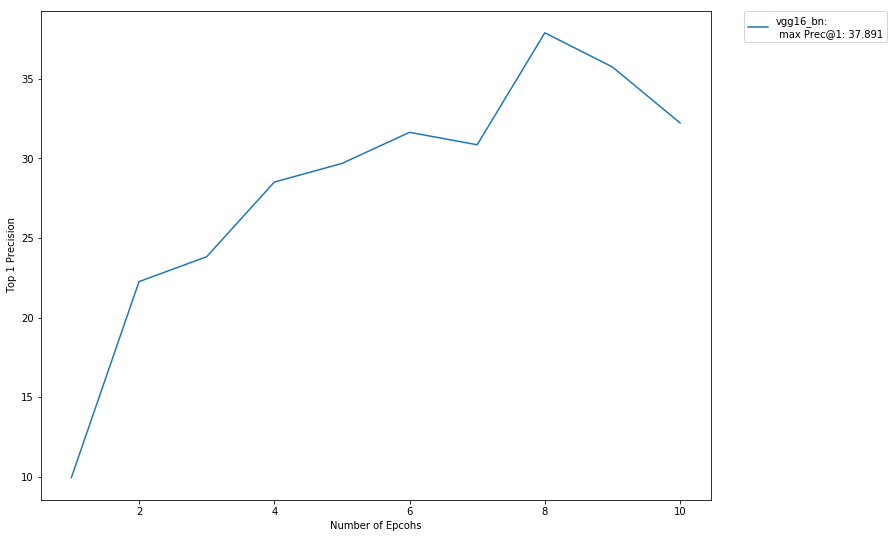

In [46]:
for key in sorted(shows.keys()): #return lables of dictionary, not values
    epochs = np.arange(1, 1+len(shows[key])) #each key corresponds to each architerctures, which each have an...
#...array of precisions as value

    plt.plot(epochs, shows[key], label='{}:\n max Prec@1: {}'.format(key, np.max(shows[key])))
    

#plt.legend(shows.keys(), loc='upper left')
plt.rcParams['figure.figsize'] = (12,9)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of Epcohs')
plt.ylabel('Top 1 Precision')
plt.savefig('vgg16_Prec@1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
